# Scrapping Google Review

Tahap awal dari analisis ini adalah melakukan scrapping pada Google Maps Review. Digunakan package selenium dengan bantuan webdriver dan Beautiful Soup 4 untuk melakukan scrapping html

In [2]:
import pandas as pd
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import numpy as np
from tqdm import tqdm

## Create Function

In [8]:
def _scrapping_google_review(url):
    path_chromedriver = os.path.join(os.getcwd(),"chromedriver_win32\chromedriver.exe")
    driver = webdriver.Chrome(path_chromedriver)
    #Website
    driver.get(url)

    time.sleep(10)
    
    #Find the review button
    rev_button = '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div[1]/div[2]/div/div[1]/div[2]/span/span/span[2]'
    driver.find_element(By.XPATH, rev_button).click()
    
    time.sleep(10)
    
    #Find name
    num_rev = '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[2]/div/div[2]/div[2]'
    total_number_of_reviews = driver.find_element(By.XPATH,num_rev).text.split(" ")[0]
    total_number_of_reviews = int(total_number_of_reviews.replace('.','')) if '.' in total_number_of_reviews else int(total_number_of_reviews)
    
    print(f'Total Number of Reviews: {total_number_of_reviews}')
    print()
    time.sleep(20)
    print('Loading all reviews...')

    #Load all reviews by scrolling down
    scroll = '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]'
    scrollable_div = driver.find_element(By.XPATH,scroll)

    total_rev = round(total_number_of_reviews/10)
    if total_rev > 100:
        total_rev = 120
    else:
        pass

    for i in tqdm(range(0,(total_rev))):
        driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', 
                    scrollable_div)
        time.sleep(2)
    print('Load finished')

    more_button_xpath = 'w8nwRe.kyuRq'
    more_button = driver.find_elements(By.CLASS_NAME,more_button_xpath)
    total_button = len(more_button)
    print()
    print('Expanding Review..')

    for i in tqdm(range(total_button)):
        driver.find_element(By.CLASS_NAME,more_button_xpath).click()

    time.sleep(5)
    
    #Parse HTML
    response = BeautifulSoup(driver.page_source, 'html.parser')

    #Get all reviews
    reviews = response.find_all('div', class_='jJc9Ad')

    print(f'Total Number of Reviews Scrapped: {len(reviews)}')
    return reviews

In [4]:
def _get_review_summary(result_set):
    rev_dict = {
        'Name' : [],
        'Status': [],
        'Number of Review' :[],
        'Review Rate': [],
        'Review Time': [],
        'Review Text' : []}
        
    for result in result_set:
        review_name = result.find('div', class_ = 'd4r55').text
        try:
          review = result.find('div', class_ = 'RfnDt').text
          if review.startswith('Local Guide'):
            review_status = 'Local Guide'
          else:
            review_status = '-'
          
          try:
            review_num = review.strip('Local Guide · ')
          except:
            review_num = review

        except:
          review = 'Uncategorized'
        review_rate = result.find('span', class_='kvMYJc')["aria-label"]
        review_time = result.find('span',class_='rsqaWe').text     
        review_text = result.find('span',class_='wiI7pd').text
        rev_dict['Name'].append(review_name)
        rev_dict['Status'].append(review_status)
        rev_dict['Number of Review'].append(review_num)
        rev_dict['Review Rate'].append(review_rate)
        rev_dict['Review Time'].append(review_time)
        rev_dict['Review Text'].append(review_text)   
    return(pd.DataFrame(rev_dict))

In [5]:
url_tanjungperak = ['https://goo.gl/maps/sVHB1mNji9JPwraf8',
                    'https://goo.gl/maps/RFfk3iLyH6BevQWj9',
                    'https://goo.gl/maps/Wsy7K8MhCqkFJx9t6',
                    'https://goo.gl/maps/RinsTcSfiPmRLNeJ6',
                    'https://goo.gl/maps/YEEFBNzjVkAwTfPCA',
                    ]
url_roro = ['https://goo.gl/maps/EYhHYXLECArriu9u7',
            'https://goo.gl/maps/uLDkqxXNR4ZC1z529']

url_gsn = 'https://goo.gl/maps/DByBkroEE9mNyViw6'

url_snq = 'https://goo.gl/maps/gsBXNFypwh8ZJyvw6'

url_jamrud = ['https://goo.gl/maps/aS69R1iNvARqafqYA',
              'https://goo.gl/maps/M55TQDMd6vg4GCY77',
              'https://goo.gl/maps/4pdb5mdyNxtPGRy87',
              'https://goo.gl/maps/MNhgoCV25weA1jUb8',
              'https://goo.gl/maps/FK3f5m518AiaweW96']

## Places

## Roro

In [8]:
roro = []

for i in url_roro:
    a = _scrapping_google_review(i)
    roro.append(a)

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16880\1756425134.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 4

Loading all reviews...


0it [00:00, ?it/s]


Load finished

Expanding Review..


100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Total Number of Reviews Scrapped: 4
Total Number of Reviews: 33

Loading all reviews...


100%|██████████| 3/3 [00:06<00:00,  2.14s/it]


Load finished

Expanding Review..


0it [00:00, ?it/s]


Total Number of Reviews Scrapped: 33


In [10]:
a = 1
for i in roro:
  review = _get_review_summary(i)
  name = f'Google Map Review Roro {a}.xlsx'
  review.to_excel(name)
  a+=1

## Gapura Surya Nusantara (GSN)

In [12]:
gsn = _scrapping_google_review(url_gsn)

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16880\4219958328.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 120

Loading all reviews...


100%|██████████| 12/12 [00:24<00:00,  2.07s/it]


Load finished

Expanding Review..


100%|██████████| 11/11 [00:05<00:00,  2.15it/s]


Total Number of Reviews Scrapped: 120


In [13]:
review_gsn = _get_review_summary(gsn)
review_gsn.to_excel('Google Map Review GSN.xlsx')

## Tanjung Perak

In [9]:
tjperak = []

for i in url_tanjungperak:
    a = _scrapping_google_review(i)
    tjperak.append(a)

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16660\638011662.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 2186

Loading all reviews...


100%|██████████| 120/120 [04:03<00:00,  2.03s/it]


Load finished

Expanding Review..


100%|██████████| 48/48 [00:03<00:00, 13.68it/s]


Total Number of Reviews Scrapped: 930
Total Number of Reviews: 920

Loading all reviews...


100%|██████████| 92/92 [03:07<00:00,  2.04s/it]


Load finished

Expanding Review..


100%|██████████| 24/24 [00:11<00:00,  2.12it/s]


Total Number of Reviews Scrapped: 870
Total Number of Reviews: 435

Loading all reviews...


100%|██████████| 44/44 [01:31<00:00,  2.09s/it]


Load finished

Expanding Review..


100%|██████████| 5/5 [00:00<00:00,  8.99it/s]


Total Number of Reviews Scrapped: 100
Total Number of Reviews: 24

Loading all reviews...


100%|██████████| 2/2 [00:04<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


Total Number of Reviews Scrapped: 24
Total Number of Reviews: 78

Loading all reviews...


100%|██████████| 8/8 [00:16<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 2/2 [00:00<00:00,  5.89it/s]


Total Number of Reviews Scrapped: 78


In [16]:
tjperak[1] = _scrapping_google_review(url_tanjungperak[1])
tjperak[2] = _scrapping_google_review(url_tanjungperak[2])

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16660\638011662.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 920

Loading all reviews...


100%|██████████| 92/92 [03:21<00:00,  2.19s/it]


Load finished

Expanding Review..


100%|██████████| 24/24 [00:08<00:00,  2.74it/s]


Total Number of Reviews Scrapped: 910
Total Number of Reviews: 435

Loading all reviews...


100%|██████████| 44/44 [01:29<00:00,  2.03s/it]


Load finished

Expanding Review..


100%|██████████| 8/8 [00:01<00:00,  4.65it/s]


Total Number of Reviews Scrapped: 420


In [17]:
a = 1
for i in tjperak:
  review = _get_review_summary(i)
  name = f'Google Map Review Tanjung Perak {a}.xlsx'
  review.to_excel(name)
  a+=1

## Surabaya North Quay

In [18]:
snq = _scrapping_google_review(url_snq)

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16660\638011662.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 18880

Loading all reviews...


100%|██████████| 120/120 [04:04<00:00,  2.04s/it]


Load finished

Expanding Review..


100%|██████████| 289/289 [00:22<00:00, 12.58it/s]


Total Number of Reviews Scrapped: 930


In [19]:
review_snq = _get_review_summary(snq)

review_snq.to_excel('Google Map Review SNQ.xlsx')

### Jamrud

In [20]:
num = 1

for i in url_jamrud:
    a = _scrapping_google_review(i)
    review = _get_review_summary(a)
    name = f'Google Map Review Jamrud {num}.xlsx'
    review.to_excel(name)
    num+=1

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16660\638011662.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 248

Loading all reviews...


100%|██████████| 25/25 [00:50<00:00,  2.03s/it]


Load finished

Expanding Review..


100%|██████████| 6/6 [00:00<00:00,  7.58it/s]


Total Number of Reviews Scrapped: 180
Total Number of Reviews: 471

Loading all reviews...


100%|██████████| 47/47 [01:35<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 14/14 [00:02<00:00,  5.59it/s]


Total Number of Reviews Scrapped: 470
Total Number of Reviews: 250

Loading all reviews...


100%|██████████| 25/25 [00:50<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 6/6 [00:00<00:00,  6.07it/s]


Total Number of Reviews Scrapped: 250
Total Number of Reviews: 15

Loading all reviews...


100%|██████████| 2/2 [00:04<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 1/1 [00:00<00:00,  9.93it/s]


Total Number of Reviews Scrapped: 15
Total Number of Reviews: 85

Loading all reviews...


100%|██████████| 8/8 [00:16<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 2/2 [00:00<00:00, 10.78it/s]


Total Number of Reviews Scrapped: 85


# Cleaning Data

In [11]:
import re
import pandas as pd
import numpy as np

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from tqdm import tqdm 
from IPython.display import clear_output

In [4]:
def _remove_emoji(string):
    '''Membersihkan Emoji'''
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [47]:
fac = StopWordRemoverFactory()
stopword = fac.create_stop_word_remover()

stem = StemmerFactory()
stemer = stem.create_stemmer()

def _stopstem(string):
    '''Menghapus stopwords dan melakukan stemming'''
    removed = []
    for word in string.split():
        removed.append(stopword.remove(word))
    
    filtered = []
    for word in removed:
        filtered.append(stemer.stem(word))

    while '' in filtered:
        filtered.remove('')
        
    return filtered
    

In [48]:
def _preprocess(string):
    #Case Folding
    string = string.lower()
    string = string.replace('\n',' ')
    
    if string.startswith('(diterjemahkan'):
        string = ''
    else:
        pass
    
    return string

## Merge G Maps Review

In [23]:
excel_penumpang = []
excel_roro = []
for file in os.listdir(os.getcwd()):
    if file.endswith('.xlsx'):
        if 'Roro' in file:
            excel_roro.append(file)
        else:
            excel_penumpang.append(file)

In [52]:
reviewpenumpang = pd.DataFrame()
for file in excel_penumpang:
    path = os.path.join(os.getcwd(),file)
    reviewpenumpang = reviewpenumpang.append(pd.read_excel(path))
    clear_output(wait=False)
reviewpenumpang.to_excel('gabungan.xlsx')
# Hapus kolom index
reviewpenumpang = reviewpenumpang.drop(reviewpenumpang.columns[[0]],axis=1)
print(f'Total Review Awal = {len(reviewpenumpang)}')

# Hapus Review Kosong pada Review Text
reviewpenumpang = reviewpenumpang[reviewpenumpang['Review Text'].notnull()]
reviewpenumpang = reviewpenumpang.reset_index(drop=True)
print(f'Total Review dengan Komentar = {len(reviewpenumpang)}')

# Hapus Emoji
for i in tqdm(range(0,len(reviewpenumpang))):
    reviewpenumpang['Review Text'][i] = _remove_emoji(reviewpenumpang['Review Text'][i])

reviewpenumpang = reviewpenumpang[reviewpenumpang['Review Text']!= '']
reviewpenumpang = reviewpenumpang[reviewpenumpang['Review Text']!= ' ']
reviewpenumpang = reviewpenumpang.reset_index(drop=True)
print(f'Total Review setelah menghapus review yang berisikan hanya emoji = {len(reviewpenumpang)}')

# Preprocess Text
for i in tqdm(range(0,len(reviewpenumpang))):
    reviewpenumpang['Review Text'][i] = _preprocess(reviewpenumpang['Review Text'][i])

# Menghapus kembali Review Kosong pada Review Text setelah preprocess
reviewpenumpang = reviewpenumpang[reviewpenumpang['Review Text'] != '']
reviewpenumpang = reviewpenumpang.reset_index(drop=True)
print(f'Total Review dengan Komentar = {len(reviewpenumpang)}')

#Stopword removal and Stemming  
for i in tqdm(range(0,len(reviewpenumpang))):
    reviewpenumpang['Review Text'][i] = _stopstem(reviewpenumpang['Review Text'][i])

reviewpenumpang

Total Review Awal = 4412
Total Review dengan Komentar = 3089


100%|██████████| 3089/3089 [00:00<00:00, 4442.79it/s]


Total Review setelah menghapus review yang berisikan hanya emoji = 3049


100%|██████████| 3049/3049 [00:00<00:00, 4031.32it/s]


Total Review dengan Komentar = 2858


100%|██████████| 2858/2858 [07:02<00:00,  6.76it/s] 


,Name,Status,Number of Review,Review Rate,Review Time,Review Text
0,anwari anwari,Local Guide,195 ulasan,5 bintang,3 bulan lalu,"[layan, tiket, kapal, laut]"
1,Luth “Luthfurrahman” Johari,Local Guide,203 ulasan,2 bintang,sebulan lalu,"[kotor, atur, sangat, nyaman, minim, fasilitas]"
2,Wayan Meila,Local Guide,530 ulasan,5 bintang,3 tahun lalu,"[terminal, tumpang, labuh, nyaman, interior, k..."
3,saToe,Local Guide,663 ulasan,2 bintang,4 tahun lalu,"[banyak, benah, laku, lobby, arrival, departur..."
4,Zaen Gamal,Local Guide,610 ulasan,5 bintang,4 bulan lalu,"[antri, tunggu, kapal, oasis, tuju, labuh, lem..."
...,...,...,...,...,...,...
2853,Rizal Fahmi,Local Guide,318 ulasan,5 bintang,3 tahun lalu,"[pelindo, port, run]"
2854,Mohamad Rosul,Local Guide,46 ulasan,5 bintang,3 tahun lalu,[sip]
2855,Suharjo Harjo,Local Guide,1 ulasan,5 bintang,2 hari lalu,"[penuh, alam]"
2856,Copaey Poetra khayangan,Local Guide,1 ulasan,3 bintang,4 tahun lalu,[joym]


## Word Cloud

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

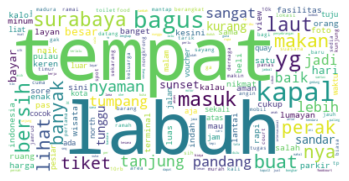

In [54]:
wordcloud = ""
for i in range(0,len(reviewpenumpang)):
    for text in reviewpenumpang['Review Text'][i]:
        wordcloud += text + " "

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(wordcloud)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## LSA

In [301]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

documents = ["doc1.txt", "doc2.txt", "doc3.txt"] 
  
# raw documents to tf-idf matrix: 
vectorizer = TfidfVectorizer(stop_words='english', 
                             use_idf=True, 
                             smooth_idf=True)
# SVD to reduce dimensionality: 
svd_model = TruncatedSVD(n_components=100,         // num dimensions
                         algorithm='randomized',
                         n_iter=10)
                         
# pipeline of tf-idf + SVD, fit to and applied to documents:
svd_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])
svd_matrix = svd_transformer.fit_transform(documents)

# svd_matrix can later be used to compare documents, compare words, or compare queries with documents

## LDA

In [ ]:
from gensim.corpora.Dictionary import load_from_text, doc2bow
from gensim.corpora import MmCorpus
from gensim.models.ldamodel import LdaModel
document = "This is some document..."
# load id->word mapping (the dictionary)
id2word = load_from_text('wiki_en_wordids.txt')
# load corpus iterator
mm = MmCorpus('wiki_en_tfidf.mm')
# extract 100 LDA topics, updating once every 10,000
lda = LdaModel(corpus=mm, id2word=id2word, num_topics=100, update_every=1, chunksize=10000, passes=1)
# use LDA model: transform new doc to bag-of-words, then apply lda
doc_bow = doc2bow(document.split())
doc_lda = lda[doc_bow]
# doc_lda is vector of length num_topics representing weighted presence of each topic in the doc